# Spectrum Plot
This notebook is used for testing and benchmarking performance of spectrum plot.

In [3]:
from time import sleep
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import generate_payload as gp
import utils
import producer

### Plot Payload Size Statistics

In [4]:
channels = []
utf_payload_size = []
protobuf_payload_size = []
unit = "MB"

protobuf_payloads = []
utf_payloads = []

for channel in range(25000, 610000, 25000):
    channels.append(channel)

    payload, size = gp.spectrum_json(channel)
    utf_payload_size.append(utils.convert_bytes(size, unit))
    utf_payloads.append(payload)

    payload, size = gp.spectrum_protobuf(channel)
    protobuf_payload_size.append(utils.convert_bytes(size, unit))
    protobuf_payloads.append(payload)


In [3]:
# check
print(f"channels = {channels}, len(channels) = {len(channels)}")

channels = [25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000, 225000, 250000, 275000, 300000, 325000, 350000, 375000, 400000, 425000, 450000, 475000, 500000, 525000, 550000, 575000, 600000], len(channels) = 24


In [27]:
_df = []

for idx, channel in enumerate(channels):
    if len(protobuf_payload_size) > 0:
        d1 = {
            "Channel": channel,
            "Size": protobuf_payload_size[idx],
            "Encoding": "ProtoBuf",
        }
        _df.append(d1)

    if len(utf_payload_size) > 0:
        d2 = {
            "Channel": channel,
            "Size": utf_payload_size[idx],
            "Encoding": "JSON (UTF-8)",
        }
        _df.append(d2)

df = pd.DataFrame(_df)

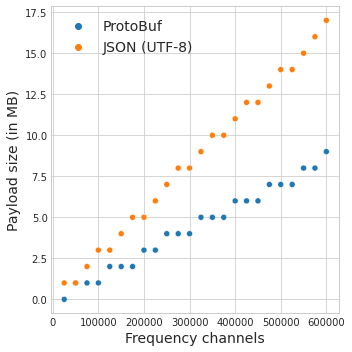

In [29]:

# plot
plt.style.use("seaborn-whitegrid")
fig = plt.figure(figsize=(5, 5), tight_layout=True)

p = sns.scatterplot(data=df, x="Channel", y="Size", hue="Encoding")

p.set_xlabel("Frequency channels", fontsize=14)
p.set_ylabel(f"Payload size (in {unit})", fontsize=14)
plt.legend(fontsize=14)

### Plot Payload Decoding Time

Send each Protobuf payload 10 times and collect decoding/deserialisation time.

In [31]:
num_iter = 10

In [ ]:
for idx in range(len(channels)):
    for d in range(num_iter):
        sleep(2)
        print(f"idx = {idx}, channels[idx] = {channels[idx]}")
        await producer.produce(pb_payloads[idx], "spectrum-protobuf")

    sleep(5)


Results

In [37]:
protobuf_decoding_time = [
    9.300000000745058,
    8,
    3,
    3,
    3.199999999254942,
    8.600000001490116,
    9.099999999627471,
    9.300000000745058,
    9.300000000745058,
    3.200000001117587,
    7.099999999627471,
    6.299999998882413,
    7.400000000372529,
    6.800000000745058,
    6.599999999627471,
    5.599999999627471,
    5.699999999254942,
    5.800000000745058,
    5.600000001490116,
    5.699999999254942,
    9,
    9.800000000745058,
    14.700000001117587,
    9.199999999254942,
    9.900000000372529,
    8.799999998882413,
    9,
    9.5,
    8.699999999254942,
    9.5,
    12.599999999627471,
    13.300000000745058,
    12.700000001117587,
    13,
    13.099999999627471,
    12.599999999627471,
    12.299999998882413,
    13.5,
    12.699999999254942,
    13.199999999254942,
    16.800000000745058,
    16.600000001490116,
    16.40000000037253,
    16.600000001490116,
    16.700000001117587,
    16.300000000745058,
    16.40000000037253,
    16.300000000745058,
    16.90000000037253,
    16.59999999962747,
    18.90000000037253,
    18.200000001117587,
    18.700000001117587,
    18.09999999962747,
    18,
    18.200000001117587,
    21.09999999962747,
    18.40000000037253,
    19.59999999962747,
    18.5,
    22.700000001117587,
    23.299999998882413,
    25,
    23,
    22.5,
    22.90000000037253,
    22.59999999962747,
    22.700000001117587,
    23.40000000037253,
    22.40000000037253,
    30.800000000745058,
    27.40000000037253,
    25.09999999962747,
    25.199999999254942,
    25.200000001117587,
    26.899999998509884,
    26.09999999962747,
    25.59999999962747,
    25.399999998509884,
    25.800000000745058,
    30.59999999962747,
    29.300000000745058,
    27.59999999962747,
    28.09999999962747,
    27.90000000037253,
    28.200000001117587,
    28.299999998882413,
    28.09999999962747,
    27.600000001490116,
    29.40000000037253,
    34,
    31.699999999254942,
    30.40000000037253,
    30.90000000037253,
    30.700000001117587,
    31.90000000037253,
    29.199999999254942,
    29.40000000037253,
    29.5,
    31.300000000745058,
    44.40000000037253,
    36.19999999925494,
    38,
    37.30000000074506,
    37.40000000037253,
    37.5,
    36.90000000037253,
    37.399999998509884,
    37.30000000074506,
    37.59999999962747,
    43.90000000037253,
    39.90000000037253,
    41,
    38.79999999888241,
    39.59999999962747,
    38,
    43.5,
    39,
    40.30000000074506,
    38.19999999925494,
    44,
    40,
    39.80000000074506,
    47,
    41.20000000111759,
    42.20000000111759,
    39.79999999888241,
    41.30000000074506,
    41,
    42.59999999962747,
    47.69999999925494,
    44.40000000037253,
    44.90000000037253,
    45.5,
    44,
    44,
    44.70000000111759,
    44.59999999962747,
    46.80000000074506,
    45.29999999888241,
    62.5,
    45.59999999962747,
    49.19999999925494,
    49.5,
    45.5,
    46.79999999888241,
    46.69999999925494,
    48.19999999925494,
    49.40000000037253,
    47.5,
    60.79999999888241,
    53.70000000111759,
    53.40000000037253,
    51.59999999962747,
    54.29999999888241,
    52.80000000074506,
    53.09999999962747,
    54.30000000074506,
    54.100000001490116,
    54,
    59.399999998509884,
    56.30000000074506,
    56.59999999962747,
    55.80000000074506,
    59.30000000074506,
    58.90000000037253,
    60.5,
    58.69999999925494,
    57.80000000074506,
    58,
    61.5,
    61.40000000037253,
    64.20000000111759,
    74.10000000149012,
    60.79999999888241,
    64.59999999962747,
    63.90000000037253,
    70.30000000074506,
    63.100000001490116,
    60.19999999925494,
    62.70000000111759,
    62.20000000111759,
    63.59999999962747,
    61.20000000111759,
    65.40000000037253,
    61.69999999925494,
    61.09999999962747,
    60.40000000037253,
    62.90000000037253,
    62.5,
    66.40000000037253,
    63.40000000037253,
    64.70000000111759,
    65.40000000037253,
    62.59999999962747,
    66,
    63.30000000074506,
    64.90000000037253,
    66.19999999925494,
    63.80000000074506,
    73.70000000111759,
    67.19999999925494,
    65.40000000037253,
    64.5,
    68.09999999962747,
    66.59999999962747,
    65.30000000074506,
    65.5,
    77.29999999888241,
    65.59999999962747,
    68.30000000074506,
    67.79999999888241,
    66.70000000111759,
    67.59999999962747,
    70.29999999888241,
    67.59999999962747,
    69.10000000149012,
    68.59999999962747,
    68.30000000074506,
    68,
    74.30000000074506,
    74.90000000037253,
    70.90000000037253,
    72.20000000111759,
    70.5,
    69.79999999888241,
    71.19999999925494,
    71.80000000074506,
    69.90000000037253,
    70.80000000074506,
    93.40000000037253,
    83.5,
    80.59999999962747,
    78.40000000037253,
    81.90000000037253,
    81.5,
    80.80000000074506,
    85.80000000074506,
    86.20000000111759,
    79.29999999888241
]

JSON/UTF-8

In [11]:
for idx in range(len(channels)):
    for d in range(num_iter):
        sleep(2)
        print(f"idx = {idx}, channels[idx] = {channels[idx]}")
        await produce(utf_payloads[idx], "spectrum-json")

    sleep(5)


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9ebc100>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdeac9d0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2700' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba0d0ac0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2710' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9fa7d90>()]> cb=[Sender._fail_all()]>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdeace50>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9ebc430>
Task was destroyed but it is pending!
task: <Task pending name='Task-2730' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9ed2be0>()]> cb=[Sender._fail_all()]>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9ed2250>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9ed2a30>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba30b760>
Task was destroyed but it is pending!
task: <Task pending name='Task-2750' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bba33c10>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2760' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba30b190>()]> cb=[Sender._fail_all()]>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba30bd00>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba30b790>


idx = 0, channels[idx] = 25000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba30b520>
Task was destroyed but it is pending!
task: <Task pending name='Task-2780' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba30b640>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2790' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9cda550>()]> cb=[Sender._fail_all()]>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9cda910>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9cdacd0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2810' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9cdaf70>()]> cb=[Sender._fail_all()]>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9cdafd0>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb954250>
Task was destroyed but it is pending!
task: <Task pending name='Task-2830' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb954610>()]> cb=[Sender._fail_all()]>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb954790>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fa79d0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2598' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb323df0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2618' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9ebcb50>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2638' coro=<Sender._sender_routin

idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb954250>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb5d91c0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2860' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9cdad30>()]> cb=[Sender._fail_all()]>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fcb160>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fcb2e0>


idx = 1, channels[idx] = 50000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fda700>
Task was destroyed but it is pending!
task: <Task pending name='Task-2880' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcb36b50>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2890' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9fda4f0>()]> cb=[Sender._fail_all()]>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9f85850>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fda8b0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2910' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9fdad60>()]> cb=[Sender._fail_all()]>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fec1c0>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fecb50>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fec880>
Task was destroyed but it is pending!
task: <Task pending name='Task-2930' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9fec040>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2940' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba352760>()]> cb=[Sender._fail_all()]>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fa7bb0>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9fec040>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdeac5b0>
Task was destroyed but it is pending!
task: <Task pending name='Task-2960' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb857cd0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2970' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba03d7c0>()]> cb=[Sender._fail_all()]>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba30bd60>


idx = 2, channels[idx] = 75000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be1b9340>
Task was destroyed but it is pending!
task: <Task pending name='Task-2990' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9ebc430>()]> cb=[Sender._fail_all()]>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb754550>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba1919d0>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba191e20>
Task was destroyed but it is pending!
task: <Task pending name='Task-3010' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba191910>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3020' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba191e80>()]> cb=[Sender._fail_all()]>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcea47f0>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8df3550>
Task was destroyed but it is pending!
task: <Task pending name='Task-3040' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8df3820>()]> cb=[Sender._fail_all()]>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8df3ee0>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8df3d30>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d65760>
Task was destroyed but it is pending!
task: <Task pending name='Task-3060' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8d653a0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3070' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8d65a30>()]> cb=[Sender._fail_all()]>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d65400>


idx = 3, channels[idx] = 100000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d65910>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d3f6a0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3090' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8d3f550>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3100' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8d3f820>()]> cb=[Sender._fail_all()]>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d3f280>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d3f670>
Task was destroyed but it is pending!
task: <Task pending name='Task-3120' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb5dd5e0>()]> cb=[Sender._fail_all()]>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb5dd7c0>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb5dd490>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb5dd370>
Task was destroyed but it is pending!
task: <Task pending name='Task-3140' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb5dd4c0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3150' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8c9b1c0>()]> cb=[Sender._fail_all()]>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8c9b2e0>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8c9bca0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3170' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8c9b070>()]> cb=[Sender._fail_all()]>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb5dde80>


idx = 4, channels[idx] = 125000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba4f29d0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3190' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba4f2cd0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2850' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba0d0040>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-2870' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba4f2d00>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9f85130>
Task was destroyed but it is pending!
task: <Task pending name='Task-3210' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8d65b50>()]> cb=[Sender._fail_all()]>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba191f40>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d65bb0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3230' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba165880>()]> cb=[Sender._fail_all()]>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bca8ed60>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bba162b0>


idx = 5, channels[idx] = 150000


Task was destroyed but it is pending!
task: <Task pending name='Task-3250' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8b6b1c0>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b6b430>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b6b430>
Task was destroyed but it is pending!
task: <Task pending name='Task-3270' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8b6b040>()]> cb=[Sender._fail_all()]>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9f85940>


idx = 5, channels[idx] = 150000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8a608e0>


idx = 6, channels[idx] = 175000


Task was destroyed but it is pending!
task: <Task pending name='Task-3290' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8a607f0>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8a60850>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb904dc0>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb2e38b0>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb2e3fa0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3320' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb2e3850>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3330' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b89a32b0>()]> cb=[Sender._fail_all()]>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b89a3730>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdbbf640>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b89a39a0>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b89a39a0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3360' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb178130>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3370' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb178520>()]> cb=[Sender._fail_all()]>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb178e20>


idx = 6, channels[idx] = 175000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb178850>
Task was destroyed but it is pending!
task: <Task pending name='Task-3390' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b895a8b0>()]> cb=[Sender._fail_all()]>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b895a0a0>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b895aac0>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b895a910>
Task was destroyed but it is pending!
task: <Task pending name='Task-3420' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdf65610>()]> cb=[Sender._fail_all()]>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdf65040>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdf65820>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8843610>
Task was destroyed but it is pending!
task: <Task pending name='Task-3450' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b88436d0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3200' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8c9b790>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3220' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8843c70>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b88437c0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3470' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b88438e0>()]> cb=[Sender._fail_all()]>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdbbfdc0>


idx = 7, channels[idx] = 200000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcb022b0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3490' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb2e3e80>()]> cb=[Sender._fail_all()]>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bbb94a60>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b6b6d0>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9e916a0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3520' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9e91640>()]> cb=[Sender._fail_all()]>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9e91b50>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9e91f10>


idx = 8, channels[idx] = 225000


Task was destroyed but it is pending!
task: <Task pending name='Task-3540' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba3a8280>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba3a80d0>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba3a8af0>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba3a8be0>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b86d99d0>


idx = 8, channels[idx] = 225000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b86d9cd0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3580' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b86d9940>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3590' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba28c760>()]> cb=[Sender._fail_all()]>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba28c340>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba28c9a0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3610' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba28c550>()]> cb=[Sender._fail_all()]>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba28cb50>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9c18580>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9c18ee0>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9c18c70>
Task was destroyed but it is pending!
task: <Task pending name='Task-3640' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9c18be0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3650' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb924310>()]> cb=[Sender._fail_all()]>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb9241f0>


idx = 9, channels[idx] = 250000


Task was destroyed but it is pending!
task: <Task pending name='Task-3460' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba4f2eb0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3480' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9f687f0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3500' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc674760>()]>

idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb9248b0>


idx = 9, channels[idx] = 250000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb86d4f0>
Task was destroyed but it is pending!
task: <Task pending name='Task-3680' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb924df0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3690' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb857fd0>()]> cb=[Sender._fail_all()]>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9c18190>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9f457c0>


idx = 10, channels[idx] = 275000


Task was destroyed but it is pending!
task: <Task pending name='Task-3710' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb754070>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb857e20>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb754910>
Task was destroyed but it is pending!
task: <Task pending name='Task-3730' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b84e69d0>()]> cb=[Sender._fail_all()]>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba191b20>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b84e6f10>
Task was destroyed but it is pending!
task: <Task pending name='Task-3750' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8de2280>()]> cb=[Sender._fail_all()]>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8de2130>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8de2070>
Task was destroyed but it is pending!
task: <Task pending name='Task-3770' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8de2970>()]> cb=[Sender._fail_all()]>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8df3b80>


idx = 10, channels[idx] = 275000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d70280>
Task was destroyed but it is pending!
task: <Task pending name='Task-3790' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8d70490>()]> cb=[Sender._fail_all()]>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d70be0>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b838f130>


idx = 11, channels[idx] = 300000


Task was destroyed but it is pending!
task: <Task pending name='Task-3810' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b838feb0>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b838f8e0>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b838f790>
Task was destroyed but it is pending!
task: <Task pending name='Task-3830' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b82d14f0>()]> cb=[Sender._fail_all()]>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b82d1520>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b82d1ac0>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b82d1460>
Task was destroyed but it is pending!
task: <Task pending name='Task-3860' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8b87040>()]> cb=[Sender._fail_all()]>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b875e0>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b879a0>


idx = 11, channels[idx] = 300000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b98550>
Task was destroyed but it is pending!
task: <Task pending name='Task-3890' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8b984f0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3670' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9c18a00>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3700' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b98d30>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8c9ba00>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d65ac0>


idx = 12, channels[idx] = 325000


Task was destroyed but it is pending!
task: <Task pending name='Task-3920' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b82d1940>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b98cd0>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8a60a00>
Task was destroyed but it is pending!
task: <Task pending name='Task-3940' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb9046a0>()]> cb=[Sender._fail_all()]>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b82d1ca0>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bca4c070>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bed81670>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b89bb610>
Task was destroyed but it is pending!
task: <Task pending name='Task-3980' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b89bb3a0>()]> cb=[Sender._fail_all()]>


idx = 12, channels[idx] = 325000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b89bb760>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b89bb850>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b73f63d0>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b73f6f10>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b73f6490>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc79faf0>
Task was destroyed but it is pending!
task: <Task pending name='Task-4040' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc79fb50>()]> cb=[Sender._fail_all()]>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdb12970>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b87eb160>


idx = 13, channels[idx] = 350000


Task was destroyed but it is pending!
task: <Task pending name='Task-3900' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8b6bac0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3910' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8b87a30>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-3930' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b82d18b0>()]>

idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcb02b20>
Task was destroyed but it is pending!
task: <Task pending name='Task-4080' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b87ebee0>()]> cb=[Sender._fail_all()]>


idx = 13, channels[idx] = 350000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8f2f449d0>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc79f250>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb2e3e80>
Task was destroyed but it is pending!
task: <Task pending name='Task-4110' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba3a81f0>()]> cb=[Sender._fail_all()]>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba387550>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bbbb1af0>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba30b580>
Task was destroyed but it is pending!
task: <Task pending name='Task-4140' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bbbb1b20>()]> cb=[Sender._fail_all()]>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b72056d0>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b72050d0>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b7205760>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b71ba820>


idx = 14, channels[idx] = 375000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b71baa00>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b71baa00>
Task was destroyed but it is pending!
task: <Task pending name='Task-4200' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9bda610>()]> cb=[Sender._fail_all()]>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9bda880>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9bda790>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b710c520>
Task was destroyed but it is pending!
task: <Task pending name='Task-4230' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b710c760>()]> cb=[Sender._fail_all()]>


idx = 15, channels[idx] = 400000


Task was destroyed but it is pending!
task: <Task pending name='Task-4070' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b87ebfd0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4090' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdb12a00>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4100' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bdd03430>()]>

idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b710cf10>


idx = 15, channels[idx] = 400000


Task was destroyed but it is pending!
task: <Task pending name='Task-4250' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb924a00>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b71ba700>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9ebcca0>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9ebcca0>


idx = 15, channels[idx] = 400000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b70de7f0>
Task was destroyed but it is pending!
task: <Task pending name='Task-4290' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b70de490>()]> cb=[Sender._fail_all()]>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b70de3a0>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b70de820>
Task was destroyed but it is pending!
task: <Task pending name='Task-4310' coro=<Sender._sender_routine() done, defined at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:81> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8d79220>()]> cb=[Sender._fail_all()]>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d79370>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bccf48e0>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bccf48e0>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b6f7dc10>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba539040>
Task was destroyed but it is pending!
task: <Task pending name='Task-4360' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8c75790>()]> cb=[Sender._fail_all()]>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8c75640>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8c755b0>


idx = 16, channels[idx] = 425000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba4f2460>


idx = 17, channels[idx] = 450000


Task was destroyed but it is pending!
task: <Task pending name='Task-4240' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b710ce50>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4260' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b87ebe20>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4270' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba191580>()]>

idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b6f7da60>
Task was destroyed but it is pending!
task: <Task pending name='Task-4410' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bb754be0>()]> cb=[Sender._fail_all()]>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba036250>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b98e80>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba387880>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b710c520>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b75367c0>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b7536070>


idx = 17, channels[idx] = 450000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b896d520>


idx = 17, channels[idx] = 450000


Task was destroyed but it is pending!
task: <Task pending name='Task-4480' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b896d100>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b896d8e0>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb13ddc0>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b6ce7760>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bc79f670>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba535910>


idx = 18, channels[idx] = 475000


Task was destroyed but it is pending!
task: <Task pending name='Task-4400' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba036d90>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4420' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba036ca0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4430' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8c75d00>()]>

idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d3f670>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb178970>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b896d520>
Task was destroyed but it is pending!
task: <Task pending name='Task-4570' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b75365e0>()]> cb=[Sender._fail_all()]>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bbb5d910>


idx = 18, channels[idx] = 475000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bdc6d850>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bddacd60>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba352f70>
Task was destroyed but it is pending!
task: <Task pending name='Task-4610' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9db30a0>()]> cb=[Sender._fail_all()]>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9db3310>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9db3520>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b865d2b0>
Task was destroyed but it is pending!
task: <Task pending name='Task-4640' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b865d7c0>()]> cb=[Sender._fail_all()]>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b865d850>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b865d850>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b715d460>


idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b715dca0>
Task was destroyed but it is pending!
task: <Task pending name='Task-4540' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba535550>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4550' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b6ce7280>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4560' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 19, channels[idx] = 500000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b715dca0>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9c18d00>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8ba494970>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcf68ee0>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b851d6d0>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b851de80>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b851df10>


idx = 20, channels[idx] = 525000


Task was destroyed but it is pending!
task: <Task pending name='Task-4750' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b8d7b670>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d7b220>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb60fdc0>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b6fd8b20>


idx = 20, channels[idx] = 525000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b6f7dcd0>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b6f034f0>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b6f03df0>


idx = 21, channels[idx] = 550000


Task was destroyed but it is pending!
task: <Task pending name='Task-4690' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8ba28c4c0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4700' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bcf68e50>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4710' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bce5fa00>()]>

idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb86d2b0>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8d7bfa0>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bcb02730>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b6b6a0>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bca46430>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b75cadc0>


idx = 21, channels[idx] = 550000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb221070>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b9f45d60>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b896dc10>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8be1377c0>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb1784f0>
Task was destroyed but it is pending!
task: <Task pending name='Task-4820' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b6fd8d00>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4830' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b6fd8910>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4840' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b5997be0>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b59971c0>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b896dc10>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b75ca970>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b8b6bc40>


idx = 22, channels[idx] = 575000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b7335880>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b73357f0>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b7335970>
Task was destroyed but it is pending!
task: <Task pending name='Task-5010' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b58ef400>()]> cb=[Sender._fail_all()]>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b58ef970>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b58ef100>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b869b8b0>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b869bdc0>


idx = 23, channels[idx] = 600000


Task was destroyed but it is pending!
task: <Task pending name='Task-4940' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b5997790>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4950' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b5997760>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-4960' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8bc6ecd90>()]>

idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8bb178a60>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b87eb580>


idx = 23, channels[idx] = 600000


Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fe8b896df40>
Task was destroyed but it is pending!
task: <Task pending name='Task-5090' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b7335790>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-5060' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fe8b9fa7ac0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-5070' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafk

Results

In [36]:
utf_decoding_time = [
    # delete first two data points
    4.599999997764826,
    3.399999998509884,
    3.600000001490116,
    3.599999997764826,
    3.800000000745058,
    3.699999999254942,
    3.5,
    3.5,
    3.399999998509884,
    3.699999999254942,
    6.800000000745058,
    7.199999999254942,
    7.400000002235174,
    6.900000002235174,
    7.800000000745058,
    6.699999999254942,
    7,
    7.099999997764826,
    7.300000000745058,
    7.199999999254942,
    11.399999998509884,
    11.300000000745058,
    12.300000000745058,
    12.299999997019768,
    10.900000002235174,
    11,
    11.600000001490116,
    10.800000000745058,
    10.5,
    10.599999997764826,
    17.900000002235174,
    15.699999999254942,
    14.700000002980232,
    14.600000001490116,
    15,
    15,
    14.600000001490116,
    14.5,
    14.800000000745058,
    14.400000002235174,
    17.600000001490116,
    17.5,
    17.800000000745058,
    18.300000000745058,
    18.099999997764826,
    17.800000000745058,
    18.300000000745058,
    17.800000000745058,
    17.699999999254942,
    17.600000001490116,
    21.399999998509884,
    26.400000002235174,
    25.200000002980232,
    24,
    24.699999999254942,
    21.300000000745058,
    23.5,
    20.900000002235174,
    24.100000001490116,
    23.899999998509884,
    26.899999998509884,
    26.599999997764826,
    26.699999999254942,
    25.199999999254942,
    25.099999997764826,
    25,
    25,
    26.100000001490116,
    27.100000001490116,
    24.600000001490116,
    28.600000001490116,
    40.30000000074506,
    32,
    28.099999997764826,
    29.400000002235174,
    29.600000001490116,
    28.900000002235174,
    29.300000000745058,
    28.199999999254942,
    28.400000002235174,
    37.30000000074506,
    33.600000001490116,
    38.100000001490116,
    33.900000002235174,
    37.69999999925494,
    34,
    39.19999999925494,
    34.899999998509884,
    37.80000000074506,
    32.399999998509884,
    44.099999997764826,
    38.20000000298023,
    44.29999999701977,
    39,
    44.100000001490116,
    36.600000001490116,
    44.5,
    37.399999998509884,
    41.400000002235174,
    37.69999999925494,
    48.80000000074506,
    51.30000000074506,
    45.599999997764826,
    45.79999999701977,
    39.80000000074506,
    46.599999997764826,
    41.400000002235174,
    46.19999999925494,
    39.899999998509884,
    47.30000000074506,
    60.20000000298023,
    48.899999998509884,
    49.29999999701977,
    51.099999997764826,
    55.900000002235174,
    47.099999997764826,
    54.30000000074506,
    48,
    54.30000000074506,
    47.599999997764826,
    60.69999999925494,
    49.19999999925494,
    52.599999997764826,
    48,
    51,
    47.899999998509884,
    53.399999998509884,
    48.600000001490116,
    52.70000000298023,
    50.099999997764826,
    66.5,
    63.100000001490116,
    57.899999998509884,
    61.69999999925494,
    57.600000001490116,
    61.100000001490116,
    59.79999999701977,
    64.10000000149012,
    63.80000000074506,
    55.5,
    70.10000000149012,
    67.19999999925494,
    69.5,
    67.80000000074506,
    67.79999999701977,
    66.80000000074506,
    67.19999999925494,
    67.69999999925494,
    69.5,
    67.60000000149012,
    73.69999999925494,
    67.89999999850988,
    70.30000000074506,
    68.5,
    72.29999999701977,
    67.90000000223517,
    70,
    68.90000000223517,
    70.39999999850988,
    69.5,
    106,
    76.10000000149012,
    77.39999999850988,
    81.39999999850988,
    82.19999999925494,
    79.80000000074506,
    83.30000000074506,
    80.80000000074506,
    82.5,
    81.09999999776483,
    101.39999999850988,
    81.5,
    83.89999999850988,
    86.30000000074506,
    84,
    83.39999999850988,
    82.69999999925494,
    84.39999999850988,
    81.69999999925494,
    84.59999999776483,
    110.60000000149012,
    76.19999999925494,
    84.20000000298023,
    84.39999999850988,
    87.60000000149012,
    84.40000000223517,
    85.39999999850988,
    87.30000000074506,
    82.80000000074506,
    85,
    119,
    85.90000000223517,
    85.89999999850988,
    86.10000000149012,
    86.60000000149012,
    88.19999999925494,
    86.70000000298023,
    88.90000000223517,
    84.19999999925494,
    86.30000000074506,
    150.69999999925494,
    90.59999999776483,
    88,
    89.80000000074506,
    89,
    90.39999999850988,
    88.20000000298023,
    91.19999999925494,
    88.39999999850988,
    89.10000000149012,
    139.80000000074506,
    101.29999999701977,
    90.69999999925494,
    90.20000000298023,
    91.30000000074506,
    90.09999999776483,
    91.69999999925494,
    88.59999999776483,
    89.40000000223517,
    91.60000000149012,
    150.19999999925494,
    99.5,
    103.30000000074506,
    102.69999999925494,
    102.80000000074506,
    102.89999999850988,
    101.89999999850988,
    101.09999999776483,
    102.10000000149012,
    108.19999999925494,
    159.09999999776483,
    103,
    105.19999999925494,
    102.60000000149012,
    103.69999999925494,
    106.90000000223517,
    102.10000000149012,
    103.69999999925494,
    127.30000000074506,
    104.09999999776483
]

Convert to DataFrame and plot

In [38]:
idx = 0

for channel in channels:
    for itr in range(num_iter):

        if len(protobuf_decoding_time) > 0:
            d1 = {
                "Channel": channel,
                "Itr": itr,
                "Time": protobuf_decoding_time[idx],
                "Encoding": "ProtoBuf",
            }
            _df.append(d1)

        if len(utf_decoding_time) > 0:
            d2 = {
                "Channel": channel,
                "Itr": itr,
                "Time": utf_decoding_time[idx],
                "Encoding": "JSON (UTF-8)",
            }
            _df.append(d2)

        idx += 1

df = pd.DataFrame(_df)

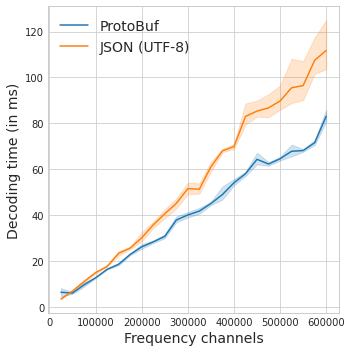

In [39]:
# create dataframe
df = gp.to_df_spectrum_decoding_stat(num_iter, channels, protobuf_decoding_time, utf_decoding_time)


# plot
plt.style.use("seaborn-whitegrid")
fig = plt.figure(figsize=(5, 5), tight_layout=True)

p = sns.lineplot(data=df, x="Channel", y="Time", hue="Encoding")

p.set_xlabel("Frequency channels", fontsize=14)
p.set_ylabel(f"Decoding time (in ms)", fontsize=14)
plt.legend(fontsize=14)


### Browser Performance
- Start performance recording at browser inspector 
- Send Protobuf payloads to browser

In [2]:
import producer

for channel in range(25000, 610000, 25000):
    sleep(1)
    payload, _ = gp.spectrum_protobuf(channel)
    await producer.produce(payload, "spectrum-protobuf")

Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fd9d941afd0>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fd956a96880>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fd9d80d4b20>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fd956a96880>
Task was destroyed but it is pending!
task: <Task pending name='Task-11' coro=<Sender._sender_routine() running at /usr/local/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fd955d21a90>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-21' coro=<Sender._sender_routine() running at /usr/local/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fd955d21520>()]> cb=[Sende

CancelledError: 

Send payloads **frequently** to browser and calculate heap memory size

In [ ]:
for channel in range(25000, 610000, 25000):
    sleep(0.1)
    payload, _ = generate_spectrum_pb(channel)
    await produce(payload, "spectrum-protobuf")

JSON payload

In [8]:
for channel in range(25000, 610000, 25000):
    sleep(1)
    payload, _ = generate_spectrum_utf(channel)
    await produce(payload, "spectrum-json")

Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fbbb5508610>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fbbb55085e0>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fbbb55085e0>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fbbb55085e0>
Task was destroyed but it is pending!
task: <Task pending name='Task-205' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fbbb9d5c1f0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-215' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:14

CancelledError: 

Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fbbbcd82f40>
Task was destroyed but it is pending!
task: <Task pending name='Task-123' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fbbbc04f9a0>()]> cb=[Sender._fail_all()]>
Task was destroyed but it is pending!
task: <Task pending name='Task-183' coro=<Sender._sender_routine() running at /home/saifulkhan/CODE/SKA/streaming-vis-perf/broker/venv/lib/python3.9/site-packages/aiokafka/producer/sender.py:147> wait_for=<Future pending cb=[<TaskWakeupMethWrapper object at 0x7fbbb9e4daf0>()]> cb=[Sender._fail_all()]>
Unclosed AIOKafkaProducer
producer: <aiokafka.producer.producer.AIOKafkaProducer object at 0x7fbbbcd983d0>
Task was destroyed but it is pending!
task: <Task pending name='Task-195' coro=<Sender._sender_routine()